In [24]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os
import numpy as np
sns.set_theme()

In [25]:
files = [file for file in os.listdir(".\\") if file.endswith(".csv")]

In [26]:
data_list = {}
df = pd.DataFrame([])
for file in files:
    data = pd.read_csv(file)
    data_list[file] = data
    df = pd.concat([df, pd.DataFrame([data["accuracy"].mean(), data["accuracy"].std()]).T.rename(columns={0: "acc", 1: "std"}, index={0: file[:-4].replace("_", " ")})])
df.sort_values(by=['acc'], ascending=False)

,acc,std
model tonic electric 2class,56.465558,14.129442
model tonic heat 2class,53.810734,7.586056
model strong 2class,52.747805,10.830039
model tonic 2class,52.655060,15.365752
model electric 2class,51.674910,7.940303
model all,50.194914,2.397856
model strong,50.029697,4.190536
model phasic,49.574642,1.707639
model phasic electric 2class,49.459392,5.695432
model phasic heat,48.974488,3.360150


In [27]:
# parse confusion matrix (saved as string in csv file) to float matrix
def parse_cm(s):
    rows = s.replace("nan", "0.").replace(" ", "").replace("\r", "").replace("\n", "")[2:-2].split("][")
    cm = []
    for row in rows:
        dots = [i for i in range(len(row)) if row[i] == '.']
        arr = [float(row[dots[-3]-1:dots[-2]-1]), float(row[dots[-2]-1:dots[-1]-1]), float(row[dots[-1]-1:])]
        cm.append(arr)
    return np.array(cm)

# calcualte confusion matrices mean over cross validation set
def calculate_mean_cm(filename):
    data = data_list[filename]["cm"][:]
    c = np.array([[0,0,0],[0,0,0],[0,0,0]])
    n = len(data)
    for x in data:
        c = c+parse_cm(x)
    return c/n

# display confusion matrices
# use two_class if only displaying the classes 0 and 1
def plot_cm(cm, two_class=False):
    cm = np.round(cm, 2)
    if two_class: 
        cm = cm[1:,1:]
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["same pain","pain -> no pain"])
    else:
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["no pain -> pain","same pain","pain -> no pain"])    
    cm_display.plot(cmap="Blues", colorbar=False)
    plt.title("Confusion Matrix", fontsize=16)
    plt.grid(False)
    plt.show()

In [28]:
cm = calculate_mean_cm(files[13])

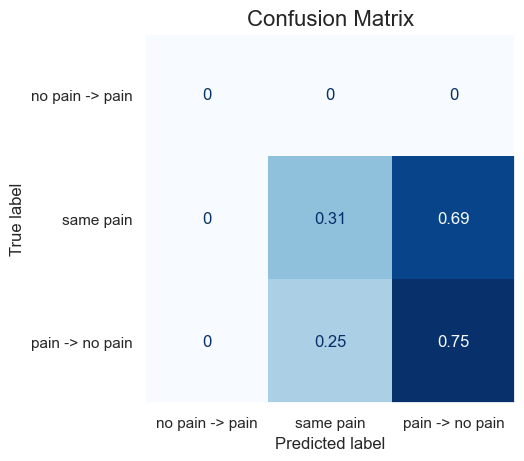

In [32]:
plot_cm(cm, two_class=False)